In [7]:
import sys, os
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))
sys.path.insert(0, os.path.join(cwd, "../student_life/"))
sys.path.insert(0, os.path.join(cwd, "../student_life/src/"))
sys.path.insert(0, os.path.join(cwd, "../student_life/src/bin/"))

import pickle
import importlib
import src.utils.student_utils as student_utils

import src.definitions as definitions
from IPython.display import display
from src.data_manager import student_life_var_binned_data_manager
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import pandas as pd
from math import pi
student_life_path = module_path

import sklearn
from sklearn import cluster as CL
from sklearn.decomposition import PCA

In [2]:
survey_path = "{}/data/dataset/survey".format(module_path)
print(survey_path)
survey_files = [f for f in os.listdir(survey_path)]
print(pd.DataFrame(survey_files))

/Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey
                          0
0  PerceivedStressScale.csv
1                 panas.csv
2               BigFive.csv
3                  psqi.csv
4              big5_agg.csv
5      FlourishingScale.csv
6       LonelinessScale.csv
7                 vr_12.csv
8                 PHQ-9.csv


In [21]:
# PHQ9
scores = {
    'PHQ9': {'Not at all': 0, 'Several days': 2, 'More than half the days': 1, 'Nearly every day': 3,
             'Not difficult at all': 0, 'Somewhat difficult': 1, 'Very difficult':2, 
             'Extremely difficult': 3, '0.0':0},
    'Lone': {'Never':1, 'Rarely':2, 'Sometimes': 3, 'Often':4}
}
def cluster(estimator, data):
    reduced_data = PCA(n_components=2).fit_transform(data)
    print(estimator)
    print()

    estimator.fit(X)
    centroids = estimator.cluster_centers_
    labels = estimator.labels_
    
    return centroids, label

def stress_weight_mean(stress_dist, N=5):
    out = np.sum([stress_dist['stress_level_stress_{}'.format(i)]*(i+1) for i in range(N)], axis=0)
    total = np.sum([stress_dist['stress_level_stress_{}'.format(i)] for i in range(N)], axis=0)
    return out/total

# Survey Init / Display

In [4]:
def load_file_by_id(idx):
    survey_file = "{}/{}".format(survey_path, survey_files[idx])
    return pd.read_csv(survey_file)

def load_survey(idx):    
    SELECTED_IDXS = idx
    sframe=None

    survey_file = "{}/{}".format(survey_path, survey_files[SELECTED_IDXS])
    print("SELECTED " + survey_file)
    sframe = pd.read_csv(survey_file)
    sframe.fillna(value=0.0, inplace=True)
    return sframe
sframe = load_survey(6)
display(sframe)

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/LonelinessScale.csv


,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,11. I feel left out,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to
0,u00,pre,Sometimes,Rarely,Never,Never,Often,Sometimes,Never,Never,...,Rarely,Rarely,Never,Never,Often,Rarely,Often,Sometimes,Often,Often
1,u01,pre,Sometimes,Rarely,Rarely,Sometimes,Often,Often,Never,Never,...,Rarely,Rarely,Never,Rarely,Often,Often,Sometimes,Never,Often,Often
2,u02,pre,Sometimes,Rarely,Rarely,Often,Often,Often,Never,Often,...,Rarely,Never,Never,Never,Often,Often,Never,Never,Often,Often
3,u03,pre,Sometimes,Rarely,Never,Often,Rarely,Rarely,Sometimes,Sometimes,...,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes
4,u04,pre,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Never,Rarely,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Rarely,Rarely
5,u05,pre,Sometimes,Rarely,Never,Often,Often,Sometimes,Never,Never,...,Rarely,Rarely,Never,Rarely,Often,Sometimes,Never,Never,Often,Often
6,u07,pre,Rarely,Never,Never,Often,Sometimes,Rarely,Never,Sometimes,...,Sometimes,Rarely,Rarely,Often,Sometimes,Often,Never,Sometimes,Often,Often
7,u08,pre,Sometimes,Sometimes,Rarely,Sometimes,Often,Often,Sometimes,Never,...,Never,Never,Never,Never,Sometimes,Sometimes,Never,Rarely,Sometimes,Sometimes
8,u09,pre,Sometimes,Sometimes,Rarely,Often,Often,Often,Sometimes,Rarely,...,Rarely,Rarely,Sometimes,Rarely,Often,Often,Sometimes,Never,Often,Often
9,u10,pre,Rarely,Often,Often,Rarely,Never,Rarely,Often,Often,...,Sometimes,Often,Often,Often,Often,Never,Never,Rarely,Rarely,Rarely


# Stress Distribution / Clustering


In [8]:
stress_file = "{}/data/stress_distribution.csv".format(module_path)
print(stress_file + " " + str(os.path.exists(stress_file)))
stress_dist = pd.read_csv(stress_file)
 
display(stress_dist)

/Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/stress_distribution.csv True


,student_id,stress_level_stress_0,stress_level_stress_1,stress_level_stress_2,stress_level_stress_3,stress_level_stress_4,cluster_,svg_stress_score_
0,1,6,27,48,9,18,2,330
1,2,3,21,48,12,21,2,342
2,4,0,6,69,42,24,2,507
3,5,6,24,9,0,0,2,81
4,7,18,93,45,6,15,2,438
5,8,6,9,126,51,93,0,1071
6,9,0,6,9,6,3,2,78
7,10,9,129,150,3,45,0,954
8,12,3,18,51,21,12,2,336
9,14,0,6,15,27,75,2,540


In [16]:
bars2 = stress_weight_mean(stress_dist)
print(len(bars2))

46


In [68]:
# Scatter Plot
def scatter(title, x, y):
    np.random.seed(19680801)
    colors = np.random.rand(len(x))
    area = 20  # 0 to 15 point radii
    plt.title(title)
    plt.scatter(x, y, s=area, c='red', alpha=0.5)
    plt.show()

## PHQ-9

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/PHQ-9.csv


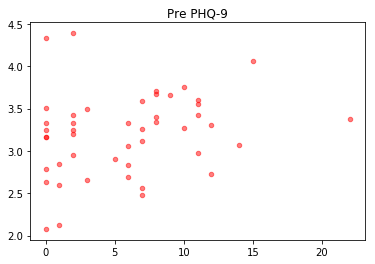

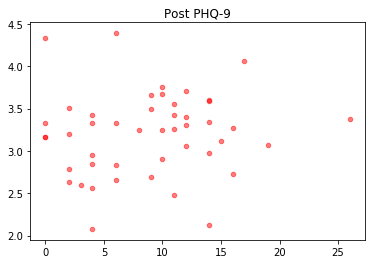

In [71]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1495268/
sframe = load_survey(8)
# for col in list(sframe): print(col)
# display(sframe)
sids = stress_dist['student_id']
def scorePHQ9(pre=True):
    Y = []
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        score = 0 
        for col in list(sframe):
            if col == 'uid' or col == 'type' or col == 'Response': continue
            keys = list(sframe.loc[sframe['uid'] == sid][col])
            if (len(keys) == 0): 
                continue
            key = min(keys) if pre else max(keys)
            score += scores['PHQ9'][key]
        Y.append(score)
    return Y

preY = scorePHQ9()   
scatter('Pre PHQ-9', preY, list(bars2))
postY = scorePHQ9(pre=False)
scatter('Post PHQ-9', postY, list(bars2))
print()


## Loneliness Scale

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/LonelinessScale.csv
[ 2  6  7 10 11 16 17 20 21]


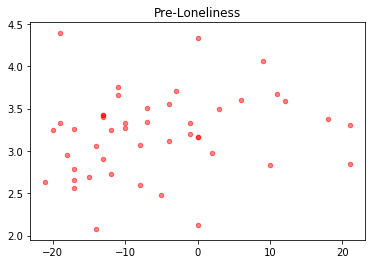

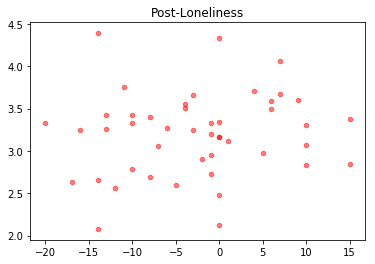

In [97]:
lone = scores['Lone']
# https://backend.fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/Self_Measures_for_Loneliness_and_Interpersonal_Problems_UCLA_LONELINESS_REVISED.pdf

sframe = load_survey(6)
# display(sframe)
neg_list = (np.array([1, 5, 6, 9, 10, 15, 16, 19, 20])+1)
cols = list(sframe)
# for x,i in enumerate(cols):
#     if (x not in neg_list): continue
#     print(x, i)
print(neg_list)
def scoreLone(pre=True):
    sids = stress_dist['student_id']
    Y = []
    cnt=0
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        score = 0
        for i, col in enumerate(list(sframe)):
            cnt+=1
            if col == 'uid' or col == 'type': continue
            key_1 = sframe.loc[sframe['uid'] == sid][col]
            keys = key_1.values
            if (len(keys)==0): continue
            key = min(keys) if pre else max(keys)
            score_i = -lone[str(key)] if i in neg_list else lone[str(key)]
            score += score_i
#             for key in keys:
#                 score += phq[str(key)]        
        Y.append(score)
    return Y
preLone = scoreLone()
postLone = scoreLone(pre=False)
scatter("Pre-Loneliness", preLone, bars2)
scatter("Post-Loneliness", postLone, bars2)

## Flourishing Scale

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/FlourishingScale.csv


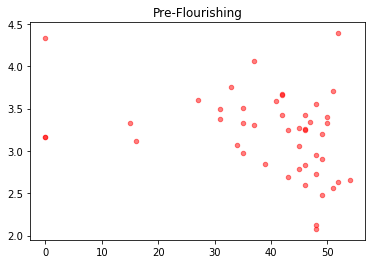

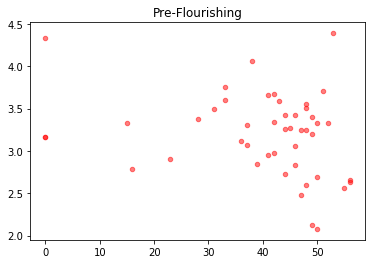

In [118]:
sframe = load_survey(5)
# display(sframe)
# for k in list(sframe): print(k)
def scoreFlour(pre=True):
    sids = stress_dist['student_id']
    Y = []
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        score = 0
        for col in list(sframe):
            if col == 'uid' or col == 'type': continue
            keys = sframe.loc[sframe['uid'] == sid][col]
            if (len(keys) == 0 ): continue
            keys = keys.values
            key = keys[0]
            if (len(keys) == 2):
                key = keys[0] if pre else keys[1]
            score += float(key)
        Y.append(score)
    return Y


preFlour = scoreFlour()
postFlour = scoreFlour(pre=False)
scatter("Pre-Flourishing", preFlour, bars2)
scatter("Pre-Flourishing", postFlour, bars2)







## PSQi

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/psqi.csv
0 uid
1 type
2 During the past month, what time have you usually gone to bed at night? 
3 During the past month, how long (in minutes) has it usually taken you to fall asleep each night?
4 When have you usually gotten up in the morning?
5 During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)
6 a. Cannot get to sleep within 30 minutes
7 b. Wake up in the middle of the night or early morning
8 c. Have to get up to use the bathroom
9 d. Cannot breathe comfortably
10 e. Cough or snore loudly
11 f. Feel too cold
12 g. Feel too hot
13 h. Have bad dreams
14 i. Have pain
15 j. Other reason(s)
16 Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):
17 During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?

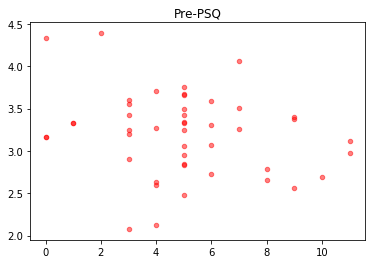

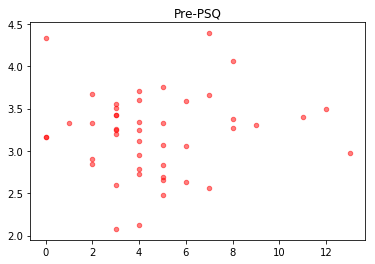

In [168]:
sframe = load_survey(3)
# https://azskincancerinstitute.org/sites/default/files/psqi_sleep_questionnaire_1_pg.pdf
# display(sframe)
def q3(x): 
    if (x < 15): return 0
    elif (x>=15 and x<30): return 1
    elif (x>=30 and x < 60): return 2
    else: return 3

def q5(x):
    if x > 7: return 0
    elif x > 6 and x <= 7: return 1
    elif x > 5 and x <= 6: return 2
    else: return 3

def q6aq8(x):
    if (x<=0): return 0
    elif (x>0 and x <=2): return 1
    elif (x>2 and x <=4): return 2
    else: return 3

def q6aj(x):
    if (x<=0): return 0
    elif (x>=1 and x<10): return 1
    elif (x>10 and x<19): return 2
    else: return 3
def s2i(x):
#     print(x)
    if type(x) is not str: return x
    s = ''
    for _x in x:
        if _x.isdigit(): s+=_x
#     print(s)
    if len(s)==0: return 0.0
    return float(s)
T = {'Not during the past month': 0, 'Less than once week': 1,  'Once or a twice week': 2
    , 'Three or a more times week': 3, 'Very good': 0, 'Fairly good': 1, 'Fairly bad': 2, 'Very bad': 3,
    0.0:0.0, '0.0':0.0}
    
for i, k in enumerate(list(sframe)): print(i, k)
print()
def scorePSQ(pre=True):
    sids = stress_dist['student_id']
    Y = []
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        score = 0
        tmp = 0
        for i,col in enumerate(list(sframe)):
            if col == 'uid' or col == 'type': continue
            keys = sframe.loc[sframe['uid'] == sid][col]
            if (len(keys) == 0 ): continue
            keys = keys.values
#             print(i, keys)
            key = keys[0]
            if (len(keys) == 2):
                key = keys[0] if pre else keys[1]
            if i == 3:
                # 3 During the past month, how long (in minutes) has it usually taken you to fall asleep each night?

                tmp += s2i(key)
            elif i == 5:
                val = s2i(key)
                score += q5(val)
            elif i == 6: 
                tmp += T[key]
                score += q3(tmp)
                tmp = 0
                # Cannot get to sleep within 30 minutes (i==3)
            elif i == 7:
                # start 7 b. Wake up in the middle of the night or early morning
                tmp = T[key]
            elif i > 7 and i < 15:
                # do lot
                tmp += T[key]
            elif i == 15:
                # 15 j. Other reason(s) exit
                tmp += T[key]
                score+=q6aj(tmp)
            elif i == 17:
                score += T[key]
                # 16 Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):
            elif i == 18:
                tmp = T[key]
                # 18 During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?
            elif i == 19:
                tmp += T[key]
                score += q6aq8(tmp)
                # 19 During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?
            elif i == 20:
                score += T[key]
#         print('-',score)
#         break
        Y.append(score)
    return Y


# print(s2i('1f34d'))
prePSQ = scorePSQ()
postPSQ = scorePSQ(pre=False)
scatter("Pre-PSQ", prePSQ, bars2)
scatter("Pre-PSQ", postPSQ, bars2)






# 

## Perceived Stress

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/PerceivedStressScale.csv


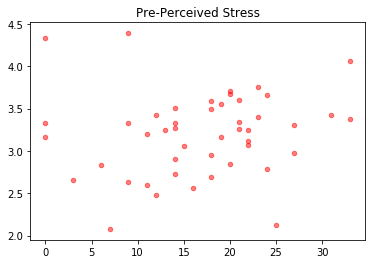

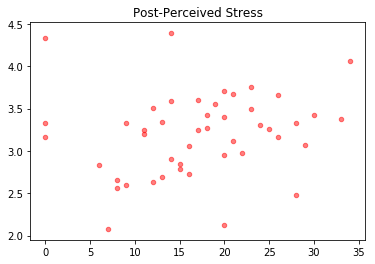

In [179]:
sframe = load_survey(0)
# https://das.nh.gov/wellness/docs/percieved%20stress%20scale.pdf
# display(sframe)
revset = np.array([4,5,7,8])+1
# for i, k in enumerate(list(sframe)): 
#     if i in revset: print(k)
T = {'Never': 0, 'Almost never': 1, 'Sometime': 2, 'Fairly often': 3, 'Very often': 4, 0.0:0.0, '0.0':0.0}

def scoreStress(pre=True):
    sids = stress_dist['student_id']
    Y = []
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        score = 0
        for i,col in enumerate(list(sframe)):
            if col == 'uid' or col == 'type': continue
            keys = sframe.loc[sframe['uid'] == sid][col]
            if (len(keys) == 0 ): continue
            keys = keys.values
#             print(keys)
            key = keys[0]
            if (len(keys) == 2):
                key = keys[0] if pre else keys[1]
            if (i in revset):
                score += float(4-T[key])
            else:
                score += float(T[key])
        Y.append(score)
    return Y


preStress = scoreStress()
postStress = scoreStress(pre=False)
scatter("Pre-Perceived Stress", preStress, bars2)
scatter("Post-Perceived Stress", postStress, bars2)

## PANAS - Positive and Negative Affect Schedule

SELECTED /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/dataset/survey/panas.csv


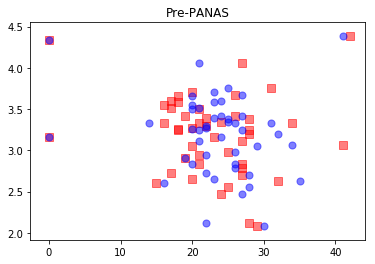

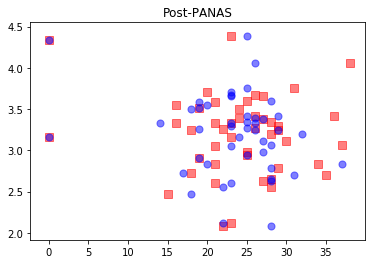

In [195]:
sframe = load_survey(1)

# display(sframe)
# for i, k in enumerate(list(sframe)): 
#     if i in revset: print(k)
T = {'Never': 0, 'Almost never': 1, 'Sometime': 2, 'Fairly often': 3, 'Very often': 4, 0.0:0.0, '0.0':0.0}

def scorePANAS(pre=True):
    sids = stress_dist['student_id']
    Pos = []
    Neg = []
    for sid in sids:
        sid = 'u0'+str(sid) if sid < 10 else 'u'+str(sid)
        pscore = 0
        nscore = 0
        for i,col in enumerate(list(sframe)):
            if col == 'uid' or col == 'type': continue
            keys = sframe.loc[sframe['uid'] == sid][col]
            if (len(keys) == 0 ): continue
            keys = keys.values

            key = keys[0]
            if (len(keys) == 2):
                key = keys[0] if pre else keys[1]
            if (i % 2 == 1):
                pscore += float(key)
            else:
                nscore += float(key)
        Pos.append(pscore)
        Neg.append(nscore)
    return Pos, Neg
 

# Scatter Plot
def scatter2(title, pos,neg, y):
    np.random.seed(19680801)
    colors = np.random.rand(len(pos))
    area = 50  # 0 to 15 point radii
    plt.title(title)
    plt.scatter(pos, y, s=area, c='red', alpha=0.5, marker='s', label='pos')
    plt.scatter(neg, y, s=area, c='blue', alpha=0.5, marker='o', label='neg')
    plt.show()

PrePos, PreNeg = scorePANAS()
PostPos, PostNeg = scorePANAS(pre=False)
scatter2("Pre-PANAS", PrePos, PreNeg, bars2)
scatter2("Post-PANAS",PostPos, PostNeg, bars2)

In [ ]:

def radar_plot(data):
    # Set data
    df = pd.DataFrame(data)

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


In [ ]:
np.array([1,2,3])/2

In [ ]:
data = {
    'group': ['A','B','C','D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
    }
radar_plot(data)

In [ ]:
input = [
    {'id': 1, 'value': 1},
    {'id': 1, 'value': 2},
    {'id': 2, 'value': 1}
]

output = {}
for i in input:
    if not i['id'] in output:
        output[i['id']] = [i]
    else:
        # output[i['id']].append(i)
        temp = output[i['id']]
        temp.append(i)
#         i['id'] = temp
print(output)

In [ ]:
print(output[1])
print(output[1][0])
print(output[1][1])